In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # For label encoding categorical features

# Aim is to predict the marks of students of the test data

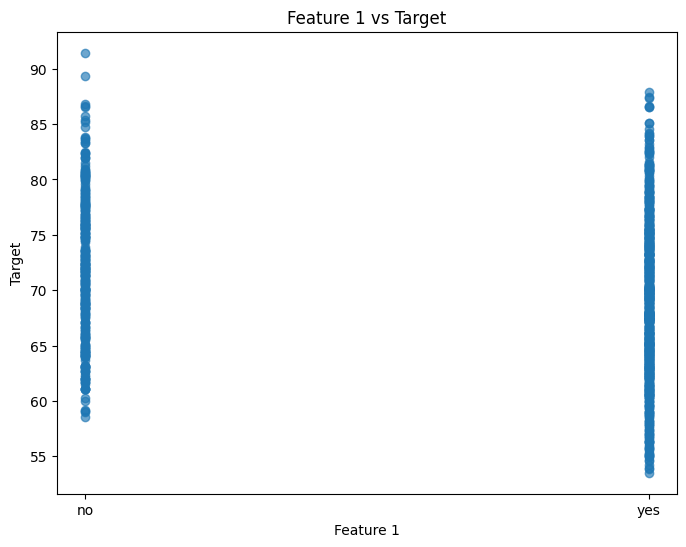

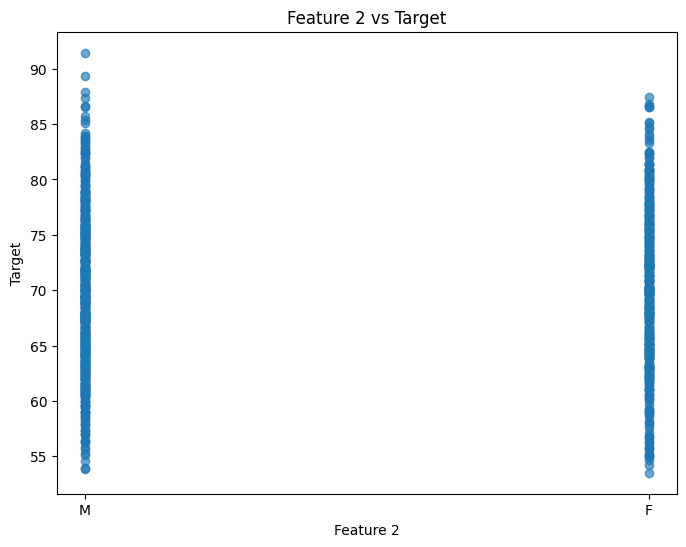

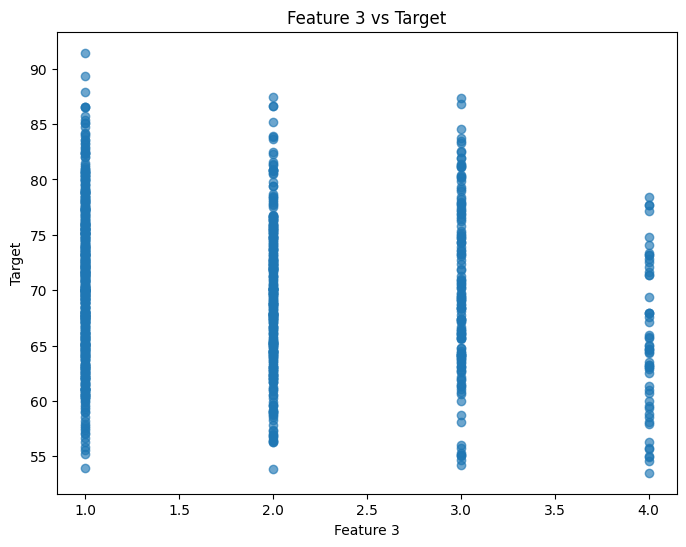

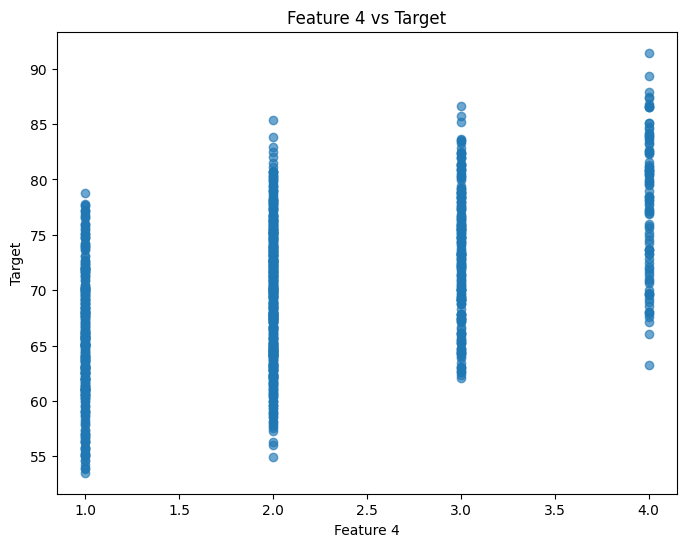

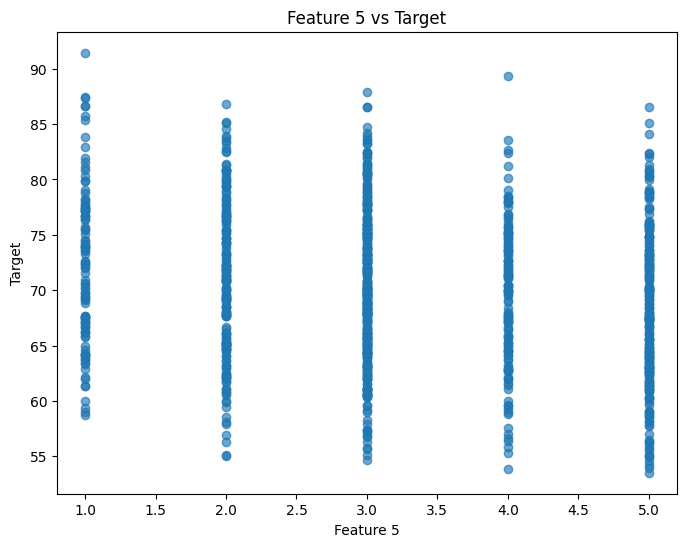

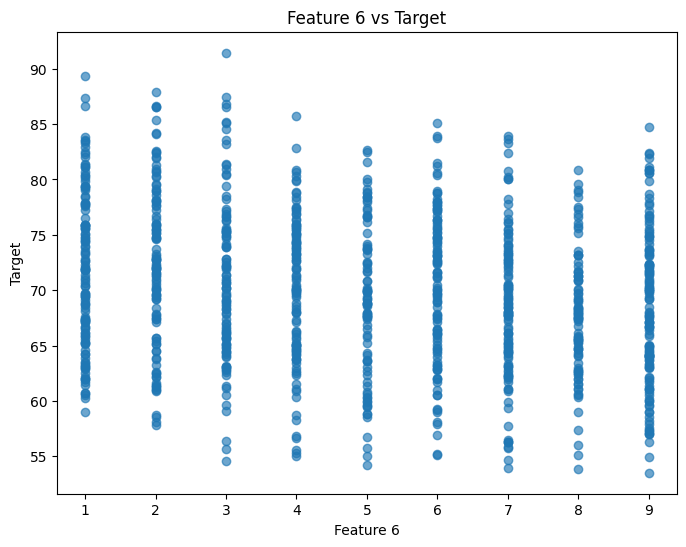

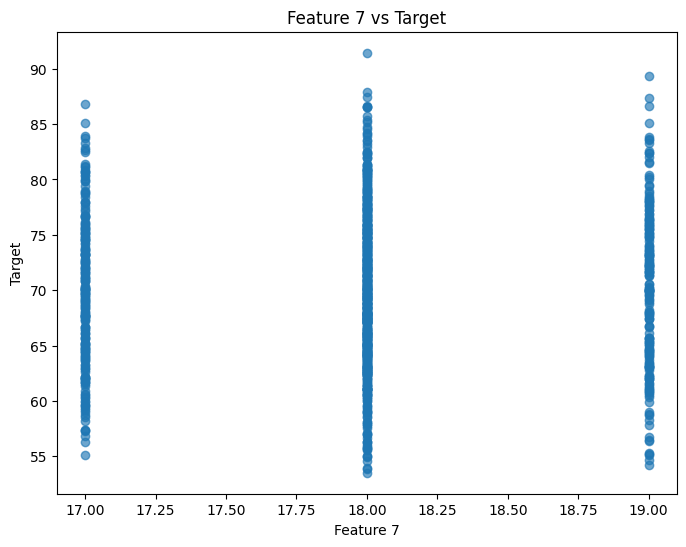

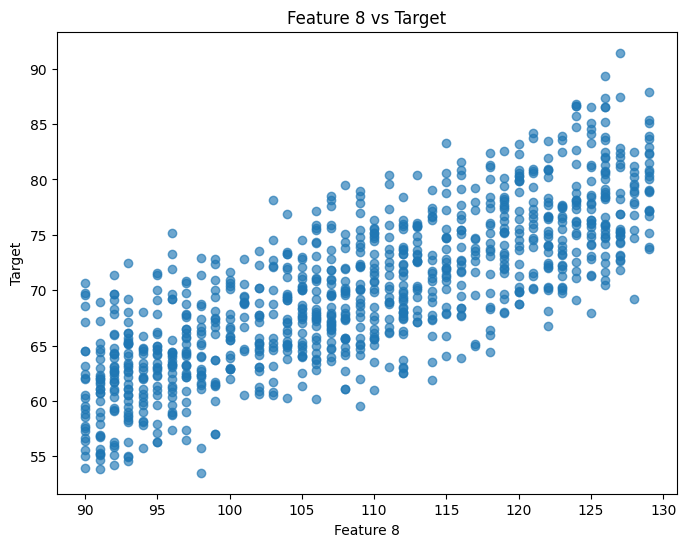

In [10]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
for i in range(x_train.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_train[:, i], y_train, alpha=0.65)
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.title(f'Feature {i+1} vs Target')
    plt.show()


# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  # ---------
    # Your code here
  # ---------
  x_traindf = pd.DataFrame(x_train)
  lab_en = LabelEncoder()
  for column in x_traindf.select_dtypes(include=['object']).columns:
      x_traindf[column] = lab_en.fit_transform(x_traindf[column])

  x_traindf['New_Feature'] = x_traindf[0] ** 2
  x_train = x_traindf.values
  return x_train

x_train = feature_changing(x_train)

In [11]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
  # ---------
  x_mean = np.mean(x_train, axis=0)
  x_std = np.std(x_train, axis=0)
  x_train_norm = (x_train - x_mean) / x_std

  return x_train_norm,x_std,x_mean


In [12]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
  # ---------
  y_pred = np.dot(x_train, w) + b
  loss = np.mean((y_pred - y_train) ** 2)

  return loss

In [13]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Choose learning rate yourself
  # ---------
  length_y = len(y_train)
  learn_rate = 0.02
  iterations=10000

  for i in range(iterations):
    y_pred = np.dot(x_train, w) + b

    dw = (1/length_y) * np.dot(x_train.T, (y_pred - y_train))
    w = w - dw * learn_rate

    db = (1/length_y) * np.sum(y_pred - y_train)
    b = b - db * learn_rate

  return w, b

In [14]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
